In [ ]:
####### Netflix Analysis ######


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df= pd.read_csv("C:/Users/JOSHI/Desktop/Python/netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
##### Data Cleaning #####
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

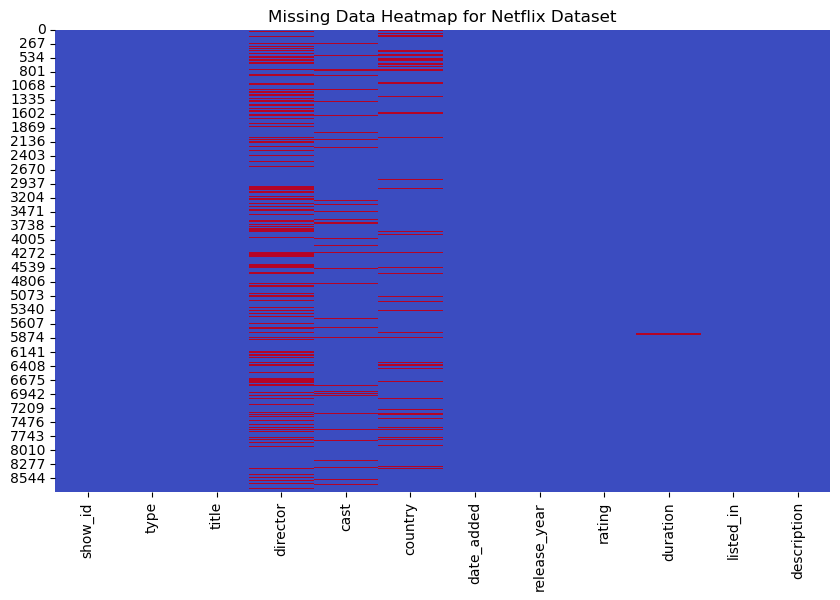

In [8]:
## Visualize Missing Data with Heatmap ##
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Data Heatmap for Netflix Dataset')
plt.show()

In [9]:
## Count Number of rows ##
num_rows=df.shape[0]
print(f" The Netflix has {num_rows} rows.")

 The Netflix has 8807 rows.


In [11]:
## Dropping missing values rows
df.dropna(subset=['director','country','rating','duration'],inplace=True)

In [12]:
## Chech for missing values again
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            415
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [14]:
## Fill missing values of cast with 'Unknown'

df['cast'].fillna('Unknown',inplace=True)

In [15]:
## Treating Duplicates
df.drop_duplicates(inplace=True)

In [16]:
num_rows=df.shape[0]
print(f" The Netflix has {num_rows} rows.")

 The Netflix has 5747 rows.


In [4]:
## Data Exploration and Visualization ##
## Top 10 contries with Most TV shows/Movies on Netflix ##

country_counts= df['country'].value_counts().head(10)
print("Top 10 countries with most TV shows/Movies on Netflix")
print(country_counts)


Top 10 countries with most TV shows/Movies on Netflix
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


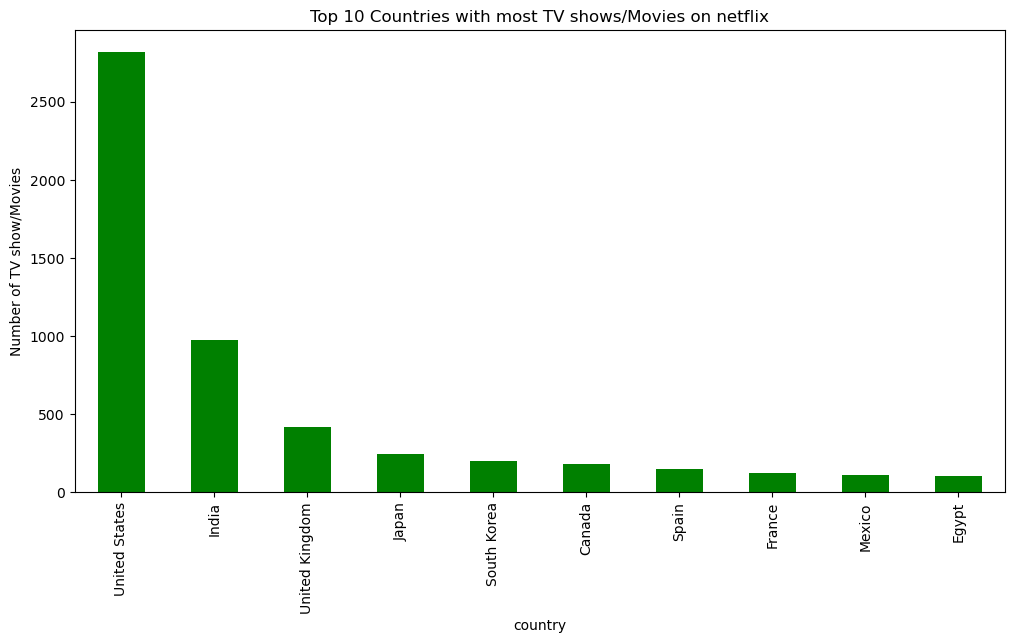

In [20]:
## Visualization of top 10 countries ##
plt.figure(figsize=(12,6))
country_counts= df['country'].value_counts().head(10)
country_counts.plot(kind='bar',color='Green')
plt.title("Top 10 Countries with most TV shows/Movies on netflix")
plt.xlabel('country')
plt.ylabel('Number of TV show/Movies')
plt.show()

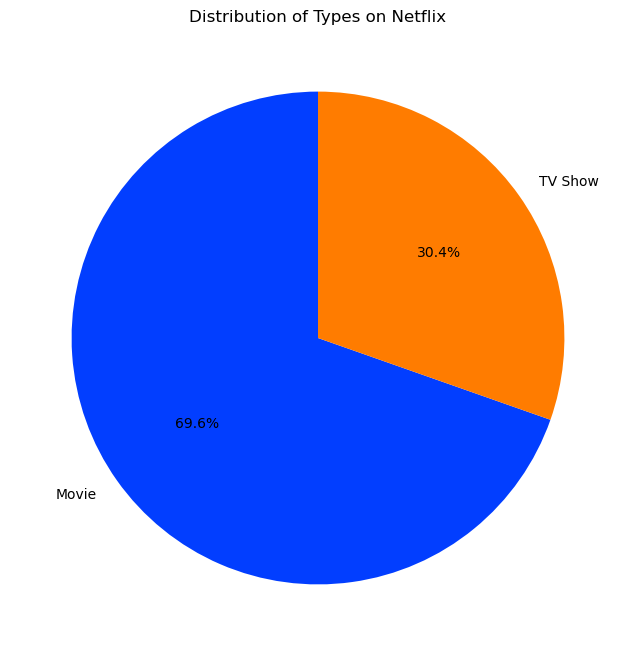

In [12]:
## Distribution of Types on Netflix ##
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('bright'), startangle=90)
plt.title('Distribution of Types on Netflix')
plt.show()

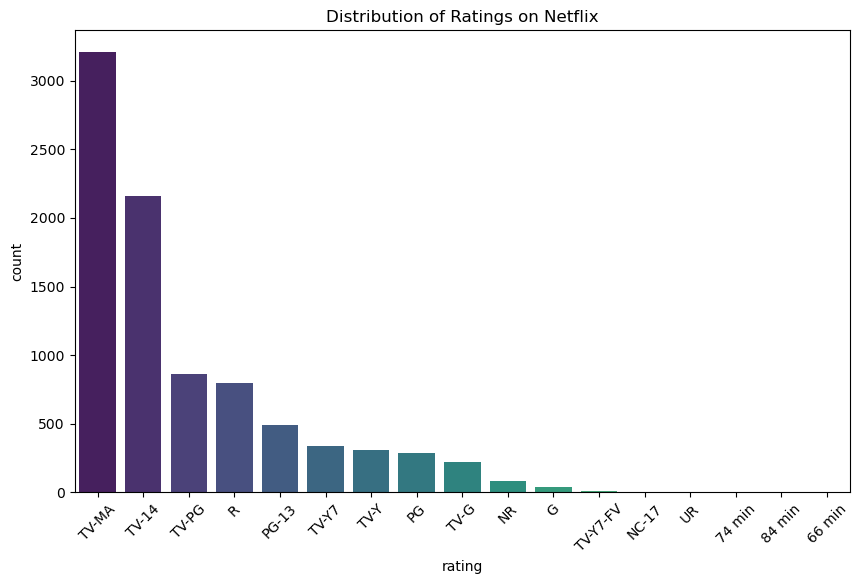

In [13]:
## Distribution of ratings on netflix ##
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings on Netflix')
plt.xticks(rotation=45)
plt.show()

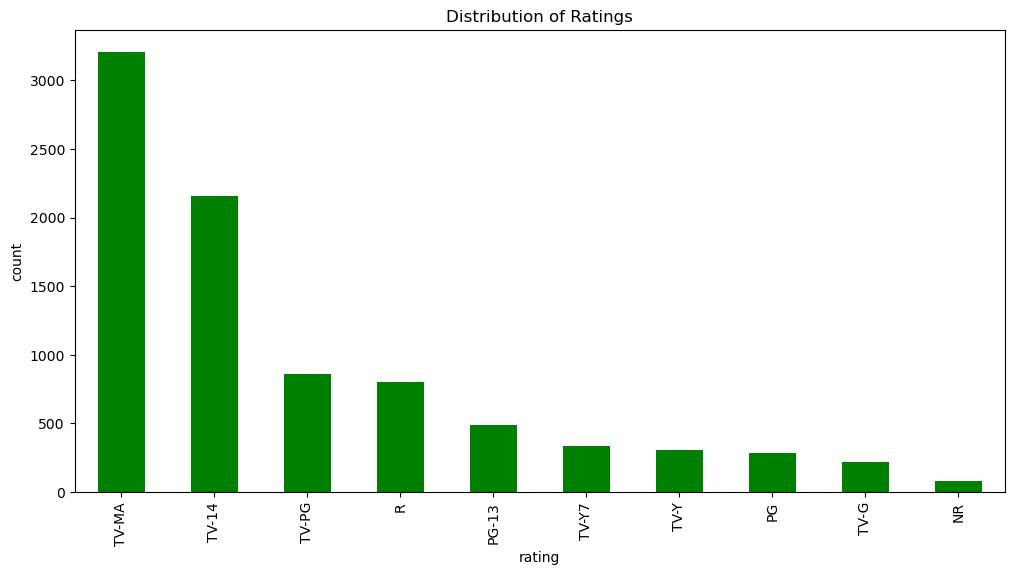

In [14]:
## Distribution of Ratings using bar graph
plt.figure(figsize=(12,6))
rating_counts= df['rating'].value_counts().head(10)
rating_counts.plot(kind='bar',color='Green')
plt.title("Distribution of Ratings")
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

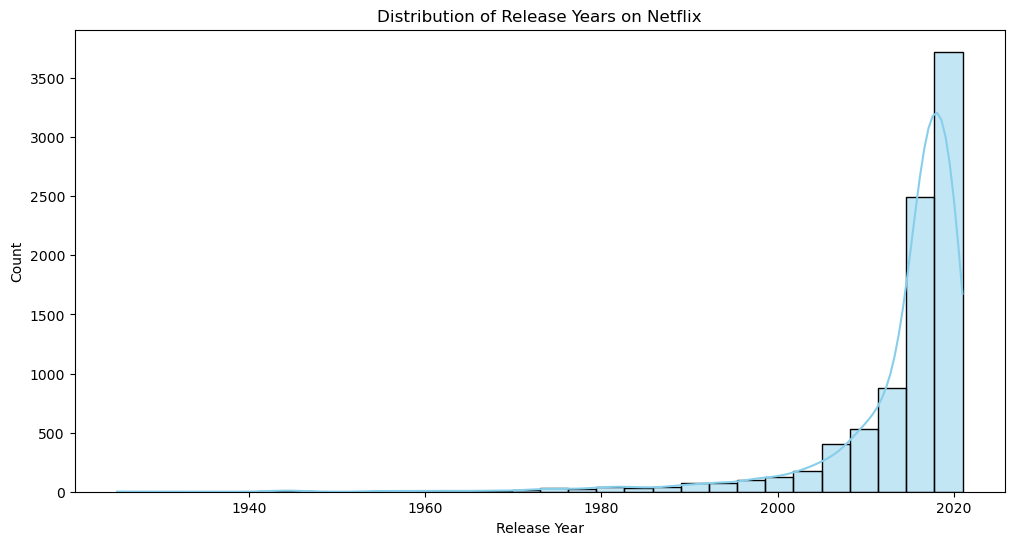

In [16]:
## Distribution of release year ##
plt.figure(figsize=(12, 6))
sns.histplot(x='release_year', data=df, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Release Years on Netflix')
plt.xlabel('Release Year')
plt.show()

In [17]:
## Split the 'listed_in' column ##
listed_in_split = df['listed_in'].str.split(',', expand=True)

print(listed_in_split.head())

                        0                        1                       2
0           Documentaries                     None                    None
1  International TV Shows                TV Dramas            TV Mysteries
2          Crime TV Shows   International TV Shows   TV Action & Adventure
3              Docuseries               Reality TV                    None
4  International TV Shows        Romantic TV Shows             TV Comedies


In [18]:
## genre count ##
genre_counts = listed_in_split.apply(lambda x: x.value_counts(), axis=1).fillna(0)

top_genres = genre_counts.sum().sort_values(ascending=False).head(10)
print("Top 10 Genres on Netflix:")
print(top_genres)

Top 10 Genres on Netflix:
 International Movies     2624.0
Dramas                    1600.0
Comedies                  1210.0
Action & Adventure         859.0
Documentaries              829.0
 Dramas                    827.0
International TV Shows     774.0
 Independent Movies        736.0
 TV Dramas                 696.0
 Romantic Movies           613.0
dtype: float64


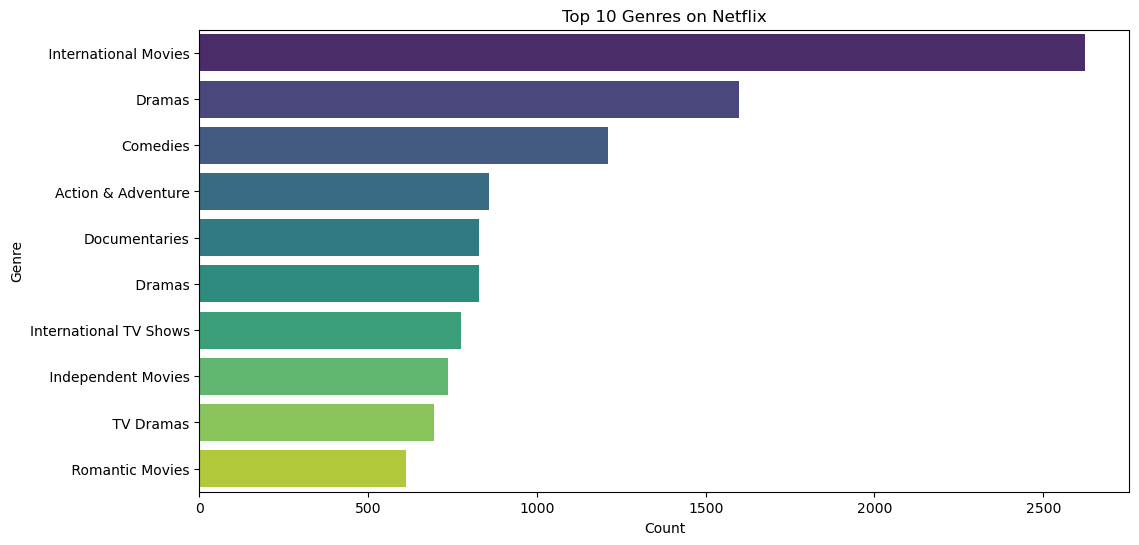

In [19]:
## Visualize distribution of Genre 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
## Insights from Netflix Data
1. We can see that from above analysis that it shows top 10 countries with most TV shows/Movies on Netflix.In that USA is on top
with 2818 TV shows/Movies.
2.As per distribution of shows 69.6% shows are Movie Type
3.As per Distribution of Ratings TV-MA are having highest ratings.
4.From distribution of release year we can say that , in Year 2020 highest number of shows were released.
5.We can say from analysis that 'International Movie' genre is having highest number of the shows.
